In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [7]:
# Load the dataset
data = pd.read_csv("booking_reviews copy.csv")


In [8]:
# Display the first few rows of the dataset
data.head()


,review_title,reviewed_at,reviewed_by,images,crawled_at,url,hotel_name,hotel_url,avg_rating,nationality,rating,review_text,raw_review_text,tags,meta
0,Exceptional,11 July 2021,Kyrylo,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,"{'language': 'en-gb', 'source': 'https://www.b..."
2,Exceptional,3 January 2020,Virginia,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Apartment with Sea View~St...,"{'language': 'en-gb', 'source': 'https://www.b..."
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,NaN,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,https://cf.bstatic.com/xdata/images/xphoto/squ...,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~People with friends~Apartment wit...,"{'language': 'en-gb', 'source': 'https://www.b..."


In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv("booking_reviews copy.csv")

# Display the first few rows of the dataset to verify it's loaded correctly
data.head()

# Preprocess the text data
def preprocess_text(text):
    # Your preprocessing steps here
    processed_text = text  # Placeholder, replace with actual preprocessing steps
    return processed_text



In [8]:
import pandas as pd

# Load the dataset
data = pd.read_csv("booking_reviews copy.csv")

# Display the first few rows of the dataset to verify it's loaded correctly
print(data.head())

# Preprocess the text data
def preprocess_text(text):
    # Your preprocessing steps here
    processed_text = text  # Placeholder, replace with actual preprocessing steps
    return processed_text

# Apply preprocessing to the 'review_text' column
data['processed_review'] = data['review_text'].apply(preprocess_text)

# Display the first few rows of the dataset with the processed reviews
print(data[['review_text', 'processed_review']].head())



                                              review       reviewed_at  \
0                                        Exceptional      11 July 2021   
1  I highly recommend this b&b! We enjoyed it a lot!  24 November 2019   
2                                        Exceptional    3 January 2020   
3  My stay in the house was a experiencing bliss ...  8 September 2019   
4  One bedroom apartment with wonderful view and ...      23 June 2019   

  reviewed_by                                             images  \
0      Kyrylo                                                NaN   
1     Dimitri                                                NaN   
2    Virginia                                                NaN   
3      Kannan                                                NaN   
4         Sue  https://cf.bstatic.com/xdata/images/xphoto/squ...   

             crawled_at                                                url  \
0  07/20/2021, 01:09:27  https://www.booking.com/reviews/be/hotel/vi

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text reviews
tfidf_features = tfidf_vectorizer.fit_transform(data['processed_review'])

# Print the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_features.shape)


Shape of TF-IDF matrix: (26386, 15383)


In [15]:
import numpy as np

# Define thresholds for sentiment labels based on average rating
positive_threshold = 7  # Ratings above 7 are positive
negative_threshold = 4  # Ratings below 4 are negative

# Create sentiment labels based on average rating
data['sentiment'] = np.where(data['avg_rating'] >= positive_threshold, 'positive',
                              np.where(data['avg_rating'] < negative_threshold, 'negative', 'neutral'))

# Display the counts of each sentiment label
print(data['sentiment'].value_counts())



sentiment
positive    25517
neutral       845
negative       24
Name: count, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, data['sentiment'], test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [18]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the sentiment labels for the testing data
y_pred = logistic_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report to view precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9651383099658962
Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         3
     neutral       0.00      0.00      0.00       181
    positive       0.97      1.00      0.98      5094

    accuracy                           0.97      5278
   macro avg       0.32      0.33      0.33      5278
weighted avg       0.93      0.97      0.95      5278

              precision    recall  f1-score   support

    negative       1.00      0.00      0.00         3
     neutral       1.00      0.00      0.00       181
    positive       0.97      1.00      0.98      5094

    accuracy                           0.97      5278
   macro avg       0.99      0.33      0.33      5278
weighted avg       0.97      0.97      0.95      5278



C:\Users\ReNew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ReNew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ReNew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [19]:
from sklearn.metrics import classification_report

# Generate a classification report to view precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.00      0.00         3
     neutral       1.00      0.00      0.00       181
    positive       0.97      1.00      0.98      5094

    accuracy                           0.97      5278
   macro avg       0.99      0.33      0.33      5278
weighted avg       0.97      0.97      0.95      5278



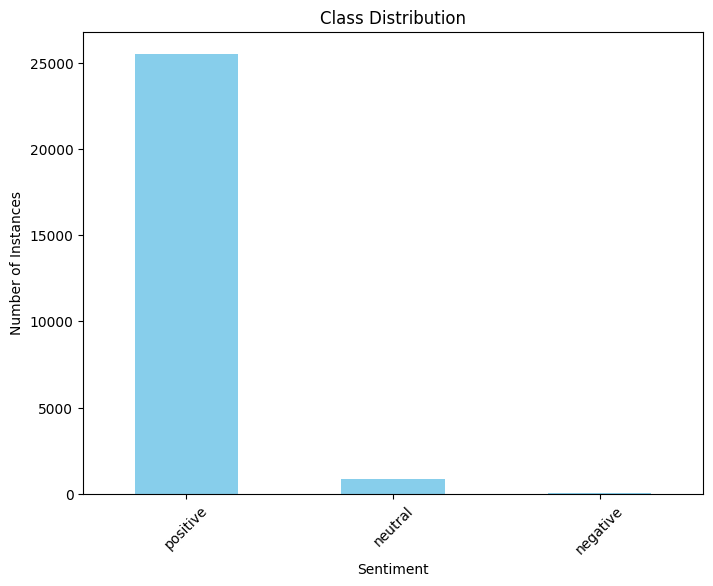

Class Frequencies:
sentiment
positive    0.967066
neutral     0.032025
negative    0.000910
Name: count, dtype: float64


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the sentiment labels
class_distribution = data['sentiment'].value_counts()

# Visualize class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

# Calculate class frequencies
total_instances = len(data)
class_frequencies = class_distribution / total_instances

print("Class Frequencies:")
print(class_frequencies)


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization type
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)


C:\Users\ReNew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ReNew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ReNew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ReNew\AppDat

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}


In [25]:
param_grid = {
    'penalty': ['l2', 'none'],  # Update penalty options
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Keep other hyperparameters as before
}


In [26]:
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}


In [27]:
from sklearn.metrics import accuracy_score, classification_report

# Predict sentiment labels for the testing dataset
y_pred = grid_search.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report to view precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9651383099658962
Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         3
     neutral       0.00      0.00      0.00       181
    positive       0.97      1.00      0.98      5094

    accuracy                           0.97      5278
   macro avg       0.32      0.33      0.33      5278
weighted avg       0.93      0.97      0.95      5278



C:\Users\ReNew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ReNew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ReNew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [28]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report to view precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


Accuracy: 0.9651383099658962
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.00      0.00         3
     neutral       1.00      0.00      0.00       181
    positive       0.97      1.00      0.98      5094

    accuracy                           0.97      5278
   macro avg       0.99      0.33      0.33      5278
weighted avg       0.97      0.97      0.95      5278



In [29]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         3
     neutral       0.00      0.00      0.00       181
    positive       0.97      1.00      0.98      5094

    accuracy                           0.97      5278
   macro avg       0.32      0.33      0.33      5278
weighted avg       0.93      0.97      0.95      5278

Confusion Matrix:
[[   0    0    3]
 [   0    0  181]
 [   0    0 5094]]


In [34]:
# Import the necessary module
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in your training data
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [35]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the Random Forest classifier on the resampled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier()

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the sentiment labels for the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Generate classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)


Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.33      0.00         3
     neutral       0.07      0.01      0.01       181
    positive       0.96      0.70      0.81      5094

    accuracy                           0.68      5278
   macro avg       0.35      0.35      0.27      5278
weighted avg       0.93      0.68      0.78      5278

Random Forest Confusion Matrix:
[[   1    0    2]
 [  47    1  133]
 [1510   13 3571]]


In [38]:
from joblib import dump

# Save the trained Random Forest model to a file
dump(rf_classifier, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [40]:
from joblib import dump

# Save the model to a file
dump(rf_classifier, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [42]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (if not already downloaded)
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

def preprocess(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    
    # Tokenize text
    words = word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words("english")]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back into text
    processed_text = " ".join(words)
    
    return processed_text



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ReNew\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ReNew\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ReNew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Define the preprocess function
def preprocess(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    
    # Tokenize text
    words = word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words("english")]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back into text
    processed_text = " ".join(words)
    
    return processed_text

# Function to predict sentiment
def predict_sentiment(review):
    # Preprocess the input review
    processed_review = preprocess(review)
    
    # Vectorize the processed review
    tfidf_features = tfidf_vectorizer.transform([processed_review])
    
    # Predict sentiment using the trained model
    sentiment = logistic_model.predict(tfidf_features)[0]
    
    return sentiment

# Input review from user
review = input("Enter your review: ")

# Predict sentiment
sentiment = predict_sentiment(review)
print("Predicted sentiment:", sentiment)


Enter your review:  very bad


NameError: name 'tfidf_vectorizer' is not defined